### Algorithms that are sensitive to outliers

1. ***Linear regression*** -- linear regression assumes that each features has linear relationship and while drawing best line the outliers will pull line towards them.
2. ***Logistic Regression*** ---- it will try to draw a line to separate two groups of points on a graph. if there are some points way out to the side, like really far away from the rest, logistic regression might try really hard to include those points in the line. This means the line might not represent the main trend of the data very well.\
***ALL unsupervised techniques***----Techniques like K-means clustering are sensitive to outliers because they aim to minimize the sum of squared distances from cluster centroids to data points. Outliers with extreme values can significantly impact the centroids' positions, potentially leading to suboptimal clustering results.

5. ***PCA***   -- since we try to capture the maximum variance it captures if we have outliers\
6. ***Neural Networks***---they rely on gradient-based optimization algorithms (e.g., stochastic gradient descent) to update the model parameters. Outliers can introduce large errors in the gradients.Also affect the activation functions, leading to large deviations in network outputs, 

### Algorithms that are NOT sensitive to outliers

1. ***Naive Bayes*** -- assumes each points independent
2. ***SVM*** --- it draws a hyper palne or marginal palne by dividing points in middle 
3. ***Decission Regressor or classifer***-- They split the data to smaller subset based on feature values in by formig node.
4. ***kNN***--- because by using K value algorithm finds nearest neighbours whcih is not dependent on far value
5. ***Ensemble techniques(Random forest and Gradient boosting)***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df[['Age']].isnull().sum()

Age    177
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

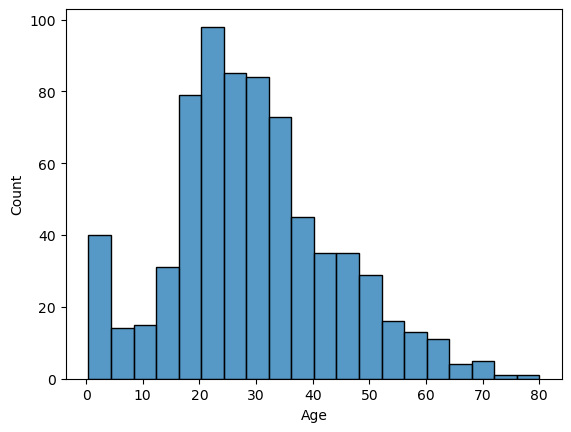

In [19]:
sns.histplot(df['Age'].dropna())

C:\Users\z004vc9h\AppData\Local\Temp\ipykernel_11348\3627397359.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(100))


<Axes: xlabel='Age', ylabel='Density'>

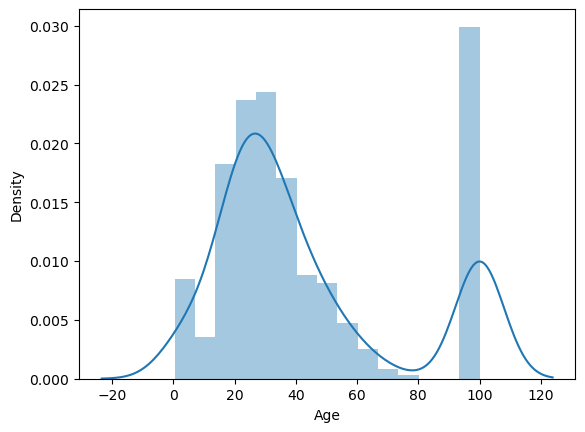

In [20]:
# we are adding outliers in Age fearure for understanding.

sns.distplot(df['Age'].fillna(100))

### Techniques used to find outliers in data

 1. Visualization---
   BoxPlot
 2. Zscore 
 2. IQR(InterQuartile Range)

## 1. Visualizatoin

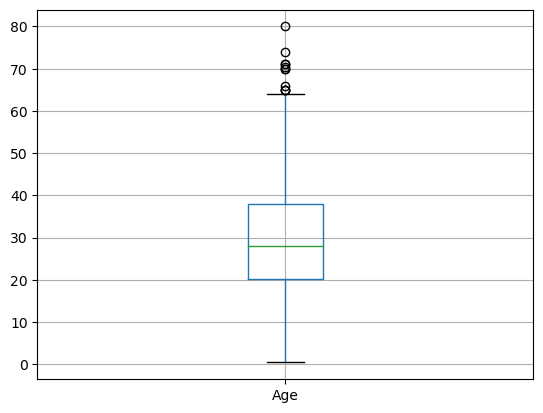

In [22]:
figure=df[['Age']].boxplot()

## 2. Zscore

Calculate the Z-score of each data point, which measures how many standard deviations it is away from the mean. Typically, data points with a Z-score greater than a certain threshold (3) are considered outliers.

In [43]:
Age_column=df[['Age']].dropna()
Age_column

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
885,39.0
886,27.0
887,19.0
889,26.0


In [45]:
from scipy.stats import zscore 

#calculating zscore of age column
Age_zscore=zscore(Age_column)
Age_zscore


,Age
0,-0.530377
1,0.571831
2,-0.254825
3,0.365167
4,0.365167
...,...
885,0.640719
886,-0.185937
887,-0.737041
889,-0.254825


In [46]:
zscore_threshold = 3

# Find outliers based on Z-scores
outliers = Age_zscore[abs(Age_zscore['Age']) > zscore_threshold]

In [47]:
outliers

,Age
630,3.465126
851,3.051798


### 3 .IQR

Calculate the IQR (the range between the 25th and 75th percentiles) and identify outliers as points that fall below the 25th percentile minus a multiplier times the IQR or above the 75th percentile plus a multiplier times the IQR.

## Handeling Outliers 

1. Removing Outliers
2. transformation(feature transformation methods)
3. winsorization

### 1. Removing Outliers
    
    Simply remove the outlier from the dataset if it's clear that it's erroneous or doesn't represent the underlying distribution of the data.

### 2.Transformation(feature transformation methods)
    Apply transformations like logarithmic, square root, or Box-Cox transformations to make the distribution more symmetric, potentially reducing the influence of outliers.

### 3.winsorization

    Winsorization is a method used to deal with outliers by capping extreme values at a specified percentile
    
   Here's how it works:

   ***Identify Percentiles*** : Choose a lower and upper percentile threshold. For example, you might decide to cap values below the 5th percentile and above the 95th percentile.

   ***Replace Outliers*** : Any value below the lower percentile is replaced with the value at the lower percentile, and any value above the upper percentile is replaced with the value at the upper percentile.